## LSTM
#### Creating a recurrent neural network using the LSTM unit to forecast values of a sin curve

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#### Creating the data

In [ ]:
series = np.sin((0.1*np.arange(200))**2)

In [ ]:
T = 10
X=[]
Y=[]
for i in range(len(series)-T):
  X.append(series[i:i+T])
  Y.append(series[i+T])


In [ ]:
N = len(X)

#### Splitting the data into training & testing, and reshaping it

In [ ]:
x_train = np.array(X[:-N//2])
x_test = np.array(X[-N//2:])
y_train = np.array(Y[:-N//2])
y_test = np.array(Y[-N//2:])


In [ ]:
x_train = x_train.reshape((-1,T, 1))
x_test = x_test.reshape((-1,T, 1))

#### Building and training the model

In [ ]:
i = tf.keras.layers.Input(shape=(10,1))
x = tf.keras.layers.LSTM(10)(i)
x = tf.keras.layers.Dense(1)(x)
model = tf.keras.models.Model(i, x)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(0.1), loss = 'mse')

In [47]:
r = model.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_test))

Epoch 1/200
3/3 [==============================] - 0s 136ms/step - loss: 0.6008 - val_loss: 0.6196
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.4869 - val_loss: 0.7589
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.4591 - val_loss: 0.9632
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.3625 - val_loss: 1.3764
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 0.2601 - val_loss: 2.1320
Epoch 6/200
3/3 [==============================] - 0s 16ms/step - loss: 0.2162 - val_loss: 2.3669
Epoch 7/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1958 - val_loss: 2.2405
Epoch 8/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1891 - val_loss: 2.0601
Epoch 9/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1788 - val_loss: 2.0232
Epoch 10/200
3/3 [==============================] - 0s 16ms/step - loss: 0.1695 - val_loss: 2.0840
Epoch 11/200
3/3 [

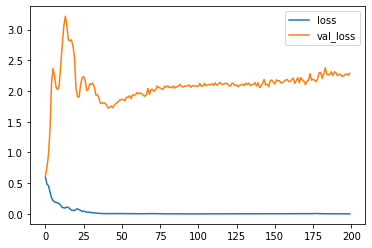

In [48]:
plt.plot(r.history['loss'], label = "loss")
plt.plot(r.history['val_loss'], label = "val_loss")
plt.legend()

In [ ]:
#Multistep forecast

predictions =[]
current = x_test[0]
while(len(y_test) > len(predictions)):
  p = model.predict(current.reshape(1,T, 1))[0,0]
  predictions.append(p)
  current = np.roll(current, -1)
  current[-1] = p

#### Evaluating the model

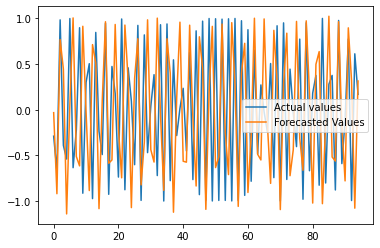

In [52]:
plt.plot(y_test, label = "Actual values")
plt.plot(predictions, label = "Forecasted Values")
plt.legend()

The LSTM did not perform very will with attempting to predict the generated time series.